<a href="https://colab.research.google.com/github/DanielAlonsoCuriel/deeplearning/blob/main/PRACTICA_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [195]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

s

In [196]:
from keras.datasets import fashion_mnist 

s

In [197]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

s

In [198]:
len(train_data)

60000

s

In [199]:
len(test_data)

10000

s

In [200]:
print(train_data.shape)
print(test_data.shape)

(60000, 28, 28)
(10000, 28, 28)


s

In [201]:
train_data = train_data.reshape((60000, 28 * 28))
print(train_data)
print(np.matrix(train_data[3000]))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[  0   0   0   0   0   0   0   0   1   1   0   0 120 131  91 147  30   0
    0   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   1   3
    0   0   0   0 251 199 172 195 152   0   0   0   0   3   1   0   0   0
    0   0   0   0   0   0   0   0   0   0   0  43 124 193 166 239 255 216
  172 228 126  61   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0  96 167 155 159 171 178 211 215 210 196 189 158 164 159 108   0   0
    0   0   0   0   0   0   0   0   0   0  83 157 131 117 120 148 148 145
  178 159 174 160 123 132 142 172  38   0   0   0   0   0   0   0   0   0
    0   0 159 128 118 120 122 112  93 124 161 109 128 128 129 146 138 167
  122   0   0   0   0   0   0   0   0   0   0   0 171 135 120 114 118 119
  107 125 123 117 124 124 119 145 147 166 148   0   0   0   0   0   0   0
    0   0   0   4 171 138 126 120 117 118 102 122 145 111 120 122 

s

In [202]:
train_data = train_data.astype('float32') / 255
train_data[3000]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00392157, 0.00392157,
       0.        , 0.        , 0.47058824, 0.5137255 , 0.35686275,
       0.5764706 , 0.11764706, 0.        , 0.        , 0.00392157,
       0.00392157, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00392157,
       0.01176471, 0.        , 0.        , 0.        , 0.        ,
       0.9843137 , 0.78039217, 0.6745098 , 0.7647059 , 0.59607846,
       0.        , 0.        , 0.        , 0.        , 0.01176471,
       0.00392157, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.16862746, 0.4862745 , 0.75686276, 0.6509804 , 0.9372549 ,
       1.        , 0.84705883, 0.6745098 , 0.89411765, 0.49411

s

In [203]:
test_data = test_data.reshape((10000, 28 * 28))
test_data = test_data.astype('float32') / 255

s

In [204]:
from keras.utils.np_utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_labels[30000]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

s

In [205]:
from tensorflow.keras import optimizers
from keras import losses
from keras import metrics
from keras import models
from keras import layers


model = models.Sequential()

#Capa 1
model.add(layers.Dense(10, activation='relu', name="Capa1",input_shape=(28*28,)))

#Capa final
model.add(layers.Dense(10, name="CapaSalida",activation='softmax'))

s

In [206]:
model.summary()


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa1 (Dense)               (None, 10)                7850      
                                                                 
 CapaSalida (Dense)          (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


s

In [207]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

s

In [208]:
one_hot_train_labels=train_labels


x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = one_hot_train_labels[:10000]
partial_y_train = one_hot_train_labels[10000:]

s

In [209]:
history = model.fit(train_data,
          train_labels,
          epochs=5,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 1.5954 - accuracy: 0.4969 - val_loss: 1.0115 - val_accuracy: 0.7071
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.8531 - accuracy: 0.7295 - val_loss: 0.7629 - val_accuracy: 0.7415
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.7142 - accuracy: 0.7600 - val_loss: 0.6812 - val_accuracy: 0.7698
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.6535 - accuracy: 0.7768 - val_loss: 0.6417 - val_accuracy: 0.7778
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.6154 - accuracy: 0.7899 - val_loss: 0.6028 - val_accuracy: 0.7972


s

In [210]:
test_loss, test_acc = model.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.6206 - accuracy: 0.7841


s

In [211]:
print('test_loss:', test_loss)
print('test_acc:', test_acc)

test_loss: 0.6206419467926025
test_acc: 0.7840999960899353


s

In [212]:
# Look at confusion matrix 
# Note, this code is taken straight from the SKLEARN website, an nice way of 
# viewing confusion matrix.
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

s

313/313 [==============================] - 1s 2ms/step
=VALORES QUE PREDICE EL MODELO ENTRENADO CON LAS IMAGENES DE TEST======
=RECORDAR QUE LA PRIMERA IMAGEN DE TEST ERA UN 7=======================
[3.1914655e-04 2.4296737e-06 4.3656935e-05 1.8740745e-04 2.8396136e-04
 1.7408301e-01 6.2184728e-05 2.8308237e-01 5.0856220e-03 5.3685021e-01]
=CONVERSION DE PREDICCIONES EN CLASES DESDE VECTORES ONE-HOT ENCODING==
[9 2 1 ... 8 1 5]
=CONVERSION DE VALORES REALES EN CLASES DESDE VECTORES ONE-HOT ENCODING
[9 2 1 ... 8 1 5]
=MATRIZ DE CONFUSION CON VALORES REALES FRENTE A LOS PREDICHOS=========
[[783  10   4  77   8   1  96   0  20   1]
 [  7 928  13  38  11   0   1   0   2   0]
 [ 18   0 608  12 203   0 149   0   9   1]
 [ 34  17   3 833  32   0  74   1   5   1]
 [  2   4 111  55 745   0  77   0   6   0]
 [  1   0   0   2   0 827   0  95   6  69]
 [204   6 132  44 178   0 401   0  35   0]
 [  0   0   0   0   0  36   0 870   0  94]
 [  5   1  10  16   7   6  27   9 918   1]
 [  0   0   0   1  

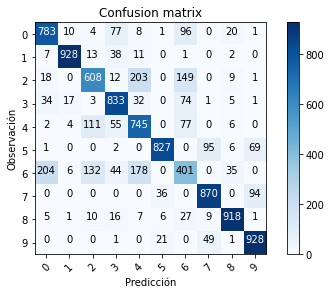

In [213]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np

# Predicción de valores desde el dataset de validación
Y_pred = model.predict(test_data)
print("=VALORES QUE PREDICE EL MODELO ENTRENADO CON LAS IMAGENES DE TEST======")
print("=RECORDAR QUE LA PRIMERA IMAGEN DE TEST ERA UN 7=======================")
print(Y_pred[0])
print("=======================================================================")
# Convertir en predicciones de clases desde los vectores one-hot encoding 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
print("=CONVERSION DE PREDICCIONES EN CLASES DESDE VECTORES ONE-HOT ENCODING==")
print(Y_pred_classes)
print("=======================================================================")
# Convertir en clases de observación desde los vectores one-hot encoding
Y_true = np.argmax(test_labels, axis = 1) 
print("=CONVERSION DE VALORES REALES EN CLASES DESDE VECTORES ONE-HOT ENCODING")
print(Y_true)
print("=======================================================================")
# Computar la matriz de confusión
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
print("=MATRIZ DE CONFUSION CON VALORES REALES FRENTE A LOS PREDICHOS=========")
print(confusion_mtx)
print("=======================================================================")
# Dibujar la matriz de confusión
print("=PINTAMOS LA MATRIZ DE CONFUSION=======================================")
plot_confusion_matrix(confusion_mtx, classes = range(10))

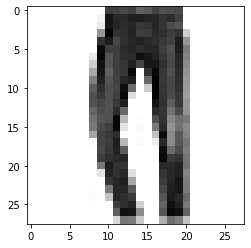

In [214]:
# Veamos el elemento 6 de test y pintémoslo con matplotlib
from keras.datasets import fashion_mnist
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()
import matplotlib.pyplot as plt
digit = test_data[5]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

s

In [215]:
train_data = train_data.reshape((60000, 28 * 28))
test_data = test_data.reshape((10000, 28 * 28))

train_data = train_data.astype('float32') / 255
test_data = test_data.astype('float32') / 255

from keras.utils.np_utils import to_categorical

print("=VEMOS LAS ETIQUETAS DE TEST ORIGINALES================================")
print(test_labels)
print("=======================================================================")
test_labels = to_categorical(test_labels)
print("=VEMOS LAS ETIQUETAS DE TEST AL PASARLAS POR to_categorical============")
print(test_labels)
print("=======================================================================")

# Hacemos las predicciones con las imágenes de Test
predictions = model.predict(test_data)

print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============")
print(predictions[5])
print("=======================================================================")
print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============")
print(np.argmax(predictions[5]))
print("=======================================================================")
print("=LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 6 DEBERÍA SER 1===")
print(np.sum(predictions[5]))
print("=======================================================================")
print("=PINTAMOS TODAS LAS PREDICCIONES=======================================")
print(predictions)

=VEMOS LAS ETIQUETAS DE TEST ORIGINALES================================
[9 2 1 ... 8 1 5]
=VEMOS LAS ETIQUETAS DE TEST AL PASARLAS POR to_categorical============
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
313/313 [==============================] - 1s 2ms/step
=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============
[2.8532350e-03 9.8452711e-01 2.2772379e-04 2.1397874e-03 9.7468048e-03
 2.2034318e-07 3.3562732e-04 2.6164669e-06 7.4739743e-05 9.2106711e-05]
=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============
1
=LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 6 DEBERÍA SER 1===
0.99999994
=PINTAMOS TODAS LAS PREDICCIONES=======================================
[[3.19146551e-04 2.42967371e-06 4.36569353e-05 ... 2.83082366e-01
  5.08562196e-03 5.36850214e-01]
 [9.67274362e-04 3.45958597e-07 8.54350507e-01 ... 5.10213249e-09
  6.35944016e-05 7.38

s

In [216]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

s

313/313 [==============================] - 1s 2ms/step


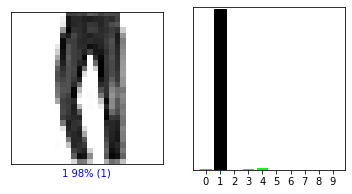

<Figure size 432x288 with 0 Axes>

In [217]:
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()
train_data = train_data.reshape((60000, 28 * 28))
test_data = test_data.reshape((10000, 28 * 28))

train_data = train_data.astype('float32') / 255
test_data = test_data.astype('float32') / 255

predictions = model.predict(test_data)

for i in range(6):
  if (i==5):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions[i], test_labels, test_data.reshape(10000,28,28))
    plt.subplot(1,2,2)
    plot_value_array(i, predictions[i],  test_labels)
    plt.show()
    plt.clf()

s

In [218]:
from keras.datasets import fashion_mnist 

In [219]:
from tensorflow.keras import optimizers
from keras import losses
from keras import metrics
from keras import models
from keras import layers


model = models.Sequential()

#Capa 2
model.add(layers.Dense(10, activation='relu', name="Capa2",input_shape=(28*28,)))

#Capa final
model.add(layers.Dense(10, name="CapaSalida",activation='softmax'))

s

In [220]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa2 (Dense)               (None, 10)                7850      
                                                                 
 CapaSalida (Dense)          (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [221]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [222]:
from keras.utils.np_utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_labels[30000]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

s

In [223]:
one_hot_train_labels=train_labels

x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = one_hot_train_labels[:10000]
partial_y_train = one_hot_train_labels[10000:]

s

In [224]:
history = model.fit(train_data,
          train_labels,
          epochs=25,
          batch_size=128)

Epoch 1/25
469/469 [==============================] - 2s 3ms/step - loss: 0.8904 - accuracy: 0.7069
Epoch 2/25
469/469 [==============================] - 1s 3ms/step - loss: 0.5344 - accuracy: 0.8135
Epoch 3/25
469/469 [==============================] - 1s 3ms/step - loss: 0.4861 - accuracy: 0.8306
Epoch 4/25
469/469 [==============================] - 1s 3ms/step - loss: 0.4605 - accuracy: 0.8411
Epoch 5/25
469/469 [==============================] - 1s 3ms/step - loss: 0.4438 - accuracy: 0.8459
Epoch 6/25
469/469 [==============================] - 1s 3ms/step - loss: 0.4318 - accuracy: 0.8497
Epoch 7/25
469/469 [==============================] - 1s 3ms/step - loss: 0.4230 - accuracy: 0.8535
Epoch 8/25
469/469 [==============================] - 1s 3ms/step - loss: 0.4155 - accuracy: 0.8554
Epoch 9/25
469/469 [==============================] - 1s 3ms/step - loss: 0.4097 - accuracy: 0.8569
Epoch 10/25
469/469 [==============================] - 1s 3ms/step - loss: 0.4049 - accuracy: 0.8595

In [225]:
test_loss, test_acc = model.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4411 - accuracy: 0.8498


In [226]:
# Look at confusion matrix 
# Note, this code is taken straight from the SKLEARN website, an nice way of 
# viewing confusion matrix.
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

313/313 [==============================] - 1s 2ms/step
=VALORES QUE PREDICE EL MODELO ENTRENADO CON LAS IMAGENES DE TEST======
=RECORDAR QUE LA PRIMERA IMAGEN DE TEST ERA UN 7=======================
[7.0026694e-08 1.4146225e-09 7.2368493e-11 3.4115012e-06 3.3120395e-07
 5.0787687e-02 3.9275569e-08 1.0799620e-01 8.2161411e-04 8.4039062e-01]
=CONVERSION DE PREDICCIONES EN CLASES DESDE VECTORES ONE-HOT ENCODING==
[9 2 1 ... 8 1 5]
=CONVERSION DE VALORES REALES EN CLASES DESDE VECTORES ONE-HOT ENCODING
[9 2 1 ... 8 1 5]
=MATRIZ DE CONFUSION CON VALORES REALES FRENTE A LOS PREDICHOS=========
[[861   1  19  49   1   3  54   0  12   0]
 [  4 956   9  26   4   0   0   0   1   0]
 [ 21   0 815  14  90   0  48   0  12   0]
 [ 40  14  12 879  14   0  34   0   7   0]
 [  0   1 147  56 723   1  64   0   8   0]
 [  0   0   0   1   0 926   0  47   4  22]
 [196   2 150  39  98   0 499   0  16   0]
 [  0   0   0   0   0  23   0 962   0  15]
 [  4   1  12   9   3   2  12   8 949   0]
 [  0   0   0   0  

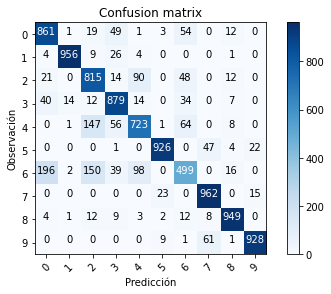

In [227]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np

# Predicción de valores desde el dataset de validación
Y_pred = model.predict(test_data)
print("=VALORES QUE PREDICE EL MODELO ENTRENADO CON LAS IMAGENES DE TEST======")
print("=RECORDAR QUE LA PRIMERA IMAGEN DE TEST ERA UN 7=======================")
print(Y_pred[0])
print("=======================================================================")
# Convertir en predicciones de clases desde los vectores one-hot encoding 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
print("=CONVERSION DE PREDICCIONES EN CLASES DESDE VECTORES ONE-HOT ENCODING==")
print(Y_pred_classes)
print("=======================================================================")
# Convertir en clases de observación desde los vectores one-hot encoding
Y_true = np.argmax(test_labels, axis = 1) 
print("=CONVERSION DE VALORES REALES EN CLASES DESDE VECTORES ONE-HOT ENCODING")
print(Y_true)
print("=======================================================================")
# Computar la matriz de confusión
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
print("=MATRIZ DE CONFUSION CON VALORES REALES FRENTE A LOS PREDICHOS=========")
print(confusion_mtx)
print("=======================================================================")
# Dibujar la matriz de confusión
print("=PINTAMOS LA MATRIZ DE CONFUSION=======================================")
plot_confusion_matrix(confusion_mtx, classes = range(10))

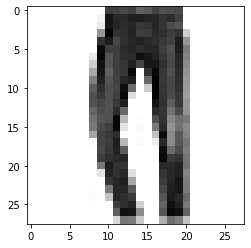

In [228]:
# Veamos el elemento 6 de test y pintémoslo con matplotlib
from keras.datasets import fashion_mnist
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()
import matplotlib.pyplot as plt
digit = test_data[5]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [229]:
train_data = train_data.reshape((60000, 28 * 28))
test_data = test_data.reshape((10000, 28 * 28))

train_data = train_data.astype('float32') / 255
test_data = test_data.astype('float32') / 255

from keras.utils.np_utils import to_categorical

print("=VEMOS LAS ETIQUETAS DE TEST ORIGINALES================================")
print(test_labels)
print("=======================================================================")
test_labels = to_categorical(test_labels)
print("=VEMOS LAS ETIQUETAS DE TEST AL PASARLAS POR to_categorical============")
print(test_labels)
print("=======================================================================")

# Hacemos las predicciones con las imágenes de Test
predictions = model.predict(test_data)

print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============")
print(predictions[5])
print("=======================================================================")
print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============")
print(np.argmax(predictions[5]))
print("=======================================================================")
print("=LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 6 DEBERÍA SER 1===")
print(np.sum(predictions[5]))
print("=======================================================================")
print("=PINTAMOS TODAS LAS PREDICCIONES=======================================")
print(predictions)

=VEMOS LAS ETIQUETAS DE TEST ORIGINALES================================
[9 2 1 ... 8 1 5]
=VEMOS LAS ETIQUETAS DE TEST AL PASARLAS POR to_categorical============
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
313/313 [==============================] - 1s 2ms/step
=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============
[5.6500528e-03 9.9308634e-01 1.4319656e-04 7.3092157e-04 2.3309469e-04
 1.3053994e-08 1.5303819e-04 2.4786623e-13 3.3039166e-06 2.9640505e-11]
=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============
1
=LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 6 DEBERÍA SER 1===
0.9999999
=PINTAMOS TODAS LAS PREDICCIONES=======================================
[[7.00266938e-08 1.41462253e-09 7.23684931e-11 ... 1.07996203e-01
  8.21614114e-04 8.40390623e-01]
 [2.86638417e-04 1.82941989e-07 9.77342427e-01 ... 6.02261740e-10
  4.40556096e-06 8.725

In [230]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

313/313 [==============================] - 1s 2ms/step


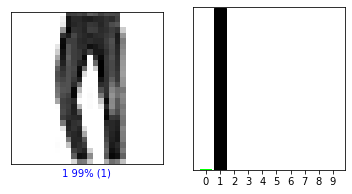

<Figure size 432x288 with 0 Axes>

In [231]:
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()
train_data = train_data.reshape((60000, 28 * 28))
test_data = test_data.reshape((10000, 28 * 28))

train_data = train_data.astype('float32') / 255
test_data = test_data.astype('float32') / 255

predictions = model.predict(test_data)

for i in range(6):
  if (i==5):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions[i], test_labels, test_data.reshape(10000,28,28))
    plt.subplot(1,2,2)
    plot_value_array(i, predictions[i],  test_labels)
    plt.show()
    plt.clf()

In [232]:
from keras.datasets import fashion_mnist 

In [233]:
from keras.utils.np_utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_labels[30000]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [234]:
from tensorflow.keras import optimizers
from keras import losses
from keras import metrics
from keras import models
from keras import layers


model = models.Sequential()
#Capa 3
model.add(layers.Dense(10, activation='sigmoid', name="Capa3",input_shape=(28*28,)))

#Capa final
model.add(layers.Dense(10, name="CapaSalida",activation='softmax'))

In [235]:
model.summary()
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa3 (Dense)               (None, 10)                7850      
                                                                 
 CapaSalida (Dense)          (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [236]:
one_hot_train_labels=train_labels


x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = one_hot_train_labels[:10000]
partial_y_train = one_hot_train_labels[10000:]

In [237]:
history = model.fit(train_data,
          train_labels,
          epochs=5,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 2.0835 - accuracy: 0.3632 - val_loss: 1.9158 - val_accuracy: 0.4916
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 1.7902 - accuracy: 0.5327 - val_loss: 1.6757 - val_accuracy: 0.5747
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 1.5835 - accuracy: 0.6001 - val_loss: 1.4976 - val_accuracy: 0.6215
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 1.4287 - accuracy: 0.6384 - val_loss: 1.3635 - val_accuracy: 0.6458
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 1.3100 - accuracy: 0.6594 - val_loss: 1.2591 - val_accuracy: 0.6629


In [238]:
test_loss, test_acc = model.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 1.2688 - accuracy: 0.6547


In [239]:
print('test_loss:', test_loss)
print('test_acc:', test_acc)

test_loss: 1.268783688545227
test_acc: 0.654699981212616


In [240]:
# Look at confusion matrix 
# Note, this code is taken straight from the SKLEARN website, an nice way of 
# viewing confusion matrix.
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

313/313 [==============================] - 1s 2ms/step
=VALORES QUE PREDICE EL MODELO ENTRENADO CON LAS IMAGENES DE TEST======
=RECORDAR QUE LA PRIMERA IMAGEN DE TEST ERA UN 7=======================
[0.01203012 0.03008822 0.05279911 0.02004893 0.03615779 0.26901412
 0.03969551 0.1244405  0.09183577 0.32388982]
=CONVERSION DE PREDICCIONES EN CLASES DESDE VECTORES ONE-HOT ENCODING==
[9 2 1 ... 0 1 7]
=CONVERSION DE VALORES REALES EN CLASES DESDE VECTORES ONE-HOT ENCODING
[9 2 1 ... 8 1 5]
=MATRIZ DE CONFUSION CON VALORES REALES FRENTE A LOS PREDICHOS=========
[[831  11  23  84  11   1  11   3  24   1]
 [ 19 908   8  47  14   0   0   0   4   0]
 [ 28   1 486  16 412   0   5   0  52   0]
 [107 111   3 728  29   0  14   1   6   1]
 [  5  10 131 106 713   0   5   0  29   1]
 [  1   3   0   1   0 283   0 429   5 278]
 [278   9 148  60 409   0  19   0  77   0]
 [  0   0   0   0   0 152   0 793   0  55]
 [ 28   1  15  13   4   2  10  34 891   2]
 [  0   0   0   1   0  83   0  20   1 895]]
=PINT

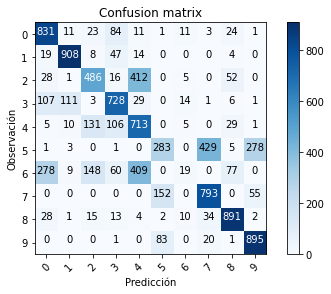

In [241]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np

# Predicción de valores desde el dataset de validación
Y_pred = model.predict(test_data)
print("=VALORES QUE PREDICE EL MODELO ENTRENADO CON LAS IMAGENES DE TEST======")
print("=RECORDAR QUE LA PRIMERA IMAGEN DE TEST ERA UN 7=======================")
print(Y_pred[0])
print("=======================================================================")
# Convertir en predicciones de clases desde los vectores one-hot encoding 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
print("=CONVERSION DE PREDICCIONES EN CLASES DESDE VECTORES ONE-HOT ENCODING==")
print(Y_pred_classes)
print("=======================================================================")
# Convertir en clases de observación desde los vectores one-hot encoding
Y_true = np.argmax(test_labels, axis = 1) 
print("=CONVERSION DE VALORES REALES EN CLASES DESDE VECTORES ONE-HOT ENCODING")
print(Y_true)
print("=======================================================================")
# Computar la matriz de confusión
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
print("=MATRIZ DE CONFUSION CON VALORES REALES FRENTE A LOS PREDICHOS=========")
print(confusion_mtx)
print("=======================================================================")
# Dibujar la matriz de confusión
print("=PINTAMOS LA MATRIZ DE CONFUSION=======================================")
plot_confusion_matrix(confusion_mtx, classes = range(10))

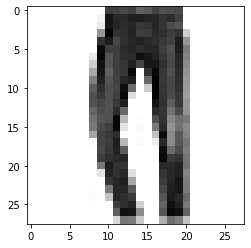

In [242]:
# Veamos el elemento 6 de test y pintémoslo con matplotlib
from keras.datasets import fashion_mnist
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()
import matplotlib.pyplot as plt
digit = test_data[5]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [243]:
train_data = train_data.reshape((60000, 28 * 28))
test_data = test_data.reshape((10000, 28 * 28))

train_data = train_data.astype('float32') / 255
test_data = test_data.astype('float32') / 255

from keras.utils.np_utils import to_categorical

print("=VEMOS LAS ETIQUETAS DE TEST ORIGINALES================================")
print(test_labels)
print("=======================================================================")
test_labels = to_categorical(test_labels)
print("=VEMOS LAS ETIQUETAS DE TEST AL PASARLAS POR to_categorical============")
print(test_labels)
print("=======================================================================")

# Hacemos las predicciones con las imágenes de Test
predictions = model.predict(test_data)

print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============")
print(predictions[5])
print("=======================================================================")
print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============")
print(np.argmax(predictions[5]))
print("=======================================================================")
print("=LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 6 DEBERÍA SER 1===")
print(np.sum(predictions[5]))
print("=======================================================================")
print("=PINTAMOS TODAS LAS PREDICCIONES=======================================")
print(predictions)

=VEMOS LAS ETIQUETAS DE TEST ORIGINALES================================
[9 2 1 ... 8 1 5]
=VEMOS LAS ETIQUETAS DE TEST AL PASARLAS POR to_categorical============
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
313/313 [==============================] - 0s 1ms/step
=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============
[0.10333535 0.43330646 0.02424177 0.21151416 0.05476763 0.03651993
 0.05233724 0.03833519 0.01948226 0.02615996]
=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============
1
=LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 6 DEBERÍA SER 1===
0.99999994
=PINTAMOS TODAS LAS PREDICCIONES=======================================
[[0.01203012 0.03008822 0.05279911 ... 0.1244405  0.09183577 0.32388982]
 [0.08675557 0.00953371 0.30428717 ... 0.03461349 0.1634361  0.07507537]
 [0.04717988 0.6108273  0.00941888 ... 0.03522106 0.0108377  0.0274656

In [244]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

313/313 [==============================] - 0s 1ms/step


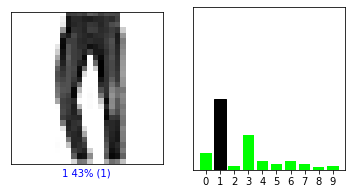

<Figure size 432x288 with 0 Axes>

In [245]:
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()
train_data = train_data.reshape((60000, 28 * 28))
test_data = test_data.reshape((10000, 28 * 28))

train_data = train_data.astype('float32') / 255
test_data = test_data.astype('float32') / 255

predictions = model.predict(test_data)

for i in range(6):
  if (i==5):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions[i], test_labels, test_data.reshape(10000,28,28))
    plt.subplot(1,2,2)
    plot_value_array(i, predictions[i],  test_labels)
    plt.show()
    plt.clf()

Probamos que pasaría si cambiamos el optimizador por 'adam' y la funcion de perdida por 'sparse_categorical_crossentropy'. El optimizador adam es una combinacion de AdaGrad y RMSProp ya que además de RMSProp, cada factor de entrenamiento también se ve afectado por el momentum del gradiente. (https://respuestasrapidas.com.mx/que-es-optimizador-adam/)
La función de pérdida sparse_categorical_crossentropy, es una medida de distancia entre probabilidades al igual que categorical_crossentropy pero este caso es usado unicamente para numeros enteros.(https://ignaciogavilan.com/catalogo-de-componentes-de-redes-neuronales-iii-funciones-de-perdida/)

In [246]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

In [247]:
from keras.datasets import fashion_mnist 

In [248]:

from keras.utils.np_utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_labels[30000]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [249]:
from tensorflow.keras import optimizers
from keras import losses
from keras import metrics
from keras import models
from keras import layers


model = models.Sequential()
#Capa 3b (sparse_categorical_crossentropy)
model.add(layers.Dense(10, activation='sigmoid', name="Capa3b",input_shape=(28*28,)))

#Capa final
model.add(layers.Dense(10, name="CapaSalida",activation='softmax'))

In [250]:
model.summary()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa3b (Dense)              (None, 10)                7850      
                                                                 
 CapaSalida (Dense)          (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [251]:
one_hot_train_labels=train_labels


x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = one_hot_train_labels[:10000]
partial_y_train = one_hot_train_labels[10000:]

In [252]:
history = model.fit(train_data,
          train_labels,
          epochs=5,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/5


InvalidArgumentError: ignored

In [57]:
test_loss, test_acc = model.evaluate(test_data, test_labels)

InvalidArgumentError: ignored

In [ ]:
print('test_loss:', test_loss)
print('test_acc:', test_acc)

test_loss: 0.5027918815612793
test_acc: 0.8307999968528748


In [ ]:
# Look at confusion matrix 
# Note, this code is taken straight from the SKLEARN website, an nice way of 
# viewing confusion matrix.
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

In [ ]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np

# Predicción de valores desde el dataset de validación
Y_pred = model.predict(test_data)
print("=VALORES QUE PREDICE EL MODELO ENTRENADO CON LAS IMAGENES DE TEST======")
print("=RECORDAR QUE LA PRIMERA IMAGEN DE TEST ERA UN 7=======================")
print(Y_pred[0])
print("=======================================================================")
# Convertir en predicciones de clases desde los vectores one-hot encoding 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
print("=CONVERSION DE PREDICCIONES EN CLASES DESDE VECTORES ONE-HOT ENCODING==")
print(Y_pred_classes)
print("=======================================================================")
# Convertir en clases de observación desde los vectores one-hot encoding
Y_true = np.argmax(test_labels, axis = 1) 
print("=CONVERSION DE VALORES REALES EN CLASES DESDE VECTORES ONE-HOT ENCODING")
print(Y_true)
print("=======================================================================")
# Computar la matriz de confusión
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
print("=MATRIZ DE CONFUSION CON VALORES REALES FRENTE A LOS PREDICHOS=========")
print(confusion_mtx)
print("=======================================================================")
# Dibujar la matriz de confusión
print("=PINTAMOS LA MATRIZ DE CONFUSION=======================================")
plot_confusion_matrix(confusion_mtx, classes = range(10))

313/313 [==============================] - 1s 2ms/step
=VALORES QUE PREDICE EL MODELO ENTRENADO CON LAS IMAGENES DE TEST======
=RECORDAR QUE LA PRIMERA IMAGEN DE TEST ERA UN 7=======================
[0.00091141 0.00170884 0.00640414 0.00130796 0.0011116  0.20259662
 0.00649214 0.16475922 0.00911771 0.6055904 ]
=CONVERSION DE PREDICCIONES EN CLASES DESDE VECTORES ONE-HOT ENCODING==
[9 2 1 ... 8 1 5]


AxisError: ignored

sssssssssssssssssssss

In [ ]:
from keras.datasets import fashion_mnist 

In [ ]:
from keras.utils.np_utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_labels[30000]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
from tensorflow.keras import optimizers
from keras import losses
from keras import metrics
from keras import models
from keras import layers


model = models.Sequential()

#Capa 4
model.add(layers.Dense(10, activation='sigmoid', name="Capa4",input_shape=(28*28,)))

#Capa final
model.add(layers.Dense(10, name="CapaSalida4",activation='softmax'))

In [ ]:
model.summary()
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa4 (Dense)               (None, 10)                7850      
                                                                 
 CapaSalida4 (Dense)         (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [ ]:
one_hot_train_labels=train_labels


x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = one_hot_train_labels[:10000]
partial_y_train = one_hot_train_labels[10000:]

In [ ]:
history = model.fit(train_data,
          train_labels,
          epochs=5,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/5
469/469 [==============================] - 1s 3ms/step - loss: 0.4776 - accuracy: 0.8376 - val_loss: 0.4697 - val_accuracy: 0.8384
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.4579 - accuracy: 0.8430 - val_loss: 0.4496 - val_accuracy: 0.8468
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.4435 - accuracy: 0.8457 - val_loss: 0.4388 - val_accuracy: 0.8465
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.4326 - accuracy: 0.8498 - val_loss: 0.4303 - val_accuracy: 0.8506
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.4240 - accuracy: 0.8522 - val_loss: 0.4228 - val_accuracy: 0.8519


In [ ]:
test_loss, test_acc = model.evaluate(test_data, test_labels)

313/313 [==============================] - 0s 2ms/step - loss: 0.4603 - accuracy: 0.8386


In [ ]:
print('test_loss:', test_loss)
print('test_acc:', test_acc)

test_loss: 0.460341215133667
test_acc: 0.8385999798774719


In [ ]:
# Look at confusion matrix 
# Note, this code is taken straight from the SKLEARN website, an nice way of 
# viewing confusion matrix.
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

313/313 [==============================] - 0s 1ms/step
=VALORES QUE PREDICE EL MODELO ENTRENADO CON LAS IMAGENES DE TEST======
=RECORDAR QUE LA PRIMERA IMAGEN DE TEST ERA UN 7=======================
[9.5403241e-04 5.6808178e-05 1.0126357e-03 6.1903126e-03 5.0215854e-04
 7.3514469e-02 2.3085792e-03 1.5479344e-01 3.4233835e-03 7.5724423e-01]
=CONVERSION DE PREDICCIONES EN CLASES DESDE VECTORES ONE-HOT ENCODING==
[9 2 1 ... 8 1 5]
=CONVERSION DE VALORES REALES EN CLASES DESDE VECTORES ONE-HOT ENCODING
[9 2 1 ... 8 1 5]
=MATRIZ DE CONFUSION CON VALORES REALES FRENTE A LOS PREDICHOS=========
[[773   1  15  58   5   1 134   0  13   0]
 [  0 950  10  32   5   0   1   0   2   0]
 [ 11   5 690   9 164   0 115   0   6   0]
 [ 21  10  10 854  42   0  58   0   5   0]
 [  0   2  76  24 799   0  95   0   4   0]
 [  0   0   0   1   0 907   0  55   4  33]
 [121   2 102  46 113   0 592   0  24   0]
 [  0   0   0   0   0  36   0 915   0  49]
 [  0   1   5   6   2   3  23   5 954   1]
 [  0   0   0   0  

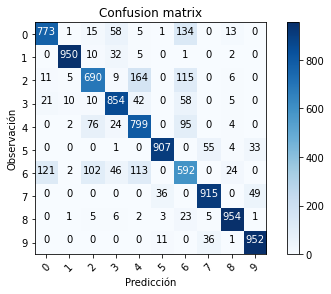

In [ ]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np

# Predicción de valores desde el dataset de validación
Y_pred = model.predict(test_data)
print("=VALORES QUE PREDICE EL MODELO ENTRENADO CON LAS IMAGENES DE TEST======")
print("=RECORDAR QUE LA PRIMERA IMAGEN DE TEST ERA UN 7=======================")
print(Y_pred[0])
print("=======================================================================")
# Convertir en predicciones de clases desde los vectores one-hot encoding 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
print("=CONVERSION DE PREDICCIONES EN CLASES DESDE VECTORES ONE-HOT ENCODING==")
print(Y_pred_classes)
print("=======================================================================")
# Convertir en clases de observación desde los vectores one-hot encoding
Y_true = np.argmax(test_labels, axis = 1) 
print("=CONVERSION DE VALORES REALES EN CLASES DESDE VECTORES ONE-HOT ENCODING")
print(Y_true)
print("=======================================================================")
# Computar la matriz de confusión
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
print("=MATRIZ DE CONFUSION CON VALORES REALES FRENTE A LOS PREDICHOS=========")
print(confusion_mtx)
print("=======================================================================")
# Dibujar la matriz de confusión
print("=PINTAMOS LA MATRIZ DE CONFUSION=======================================")
plot_confusion_matrix(confusion_mtx, classes = range(10))

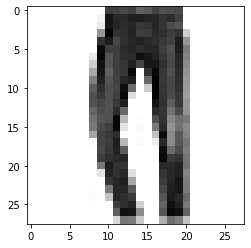

In [ ]:
# Veamos el elemento 6 de test y pintémoslo con matplotlib
from keras.datasets import fashion_mnist
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()
import matplotlib.pyplot as plt
digit = test_data[5]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
train_data = train_data.reshape((60000, 28 * 28))
test_data = test_data.reshape((10000, 28 * 28))

train_data = train_data.astype('float32') / 255
test_data = test_data.astype('float32') / 255

from keras.utils.np_utils import to_categorical

print("=VEMOS LAS ETIQUETAS DE TEST ORIGINALES================================")
print(test_labels)
print("=======================================================================")
test_labels = to_categorical(test_labels)
print("=VEMOS LAS ETIQUETAS DE TEST AL PASARLAS POR to_categorical============")
print(test_labels)
print("=======================================================================")

# Hacemos las predicciones con las imágenes de Test
predictions = model.predict(test_data)

print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============")
print(predictions[5])
print("=======================================================================")
print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============")
print(np.argmax(predictions[5]))
print("=======================================================================")
print("=LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 6 DEBERÍA SER 1===")
print(np.sum(predictions[5]))
print("=======================================================================")
print("=PINTAMOS TODAS LAS PREDICCIONES=======================================")
print(predictions)

=VEMOS LAS ETIQUETAS DE TEST ORIGINALES================================
[9 2 1 ... 8 1 5]
=VEMOS LAS ETIQUETAS DE TEST AL PASARLAS POR to_categorical============
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
313/313 [==============================] - 0s 1ms/step
=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============
[2.6238707e-03 9.8482287e-01 1.3471841e-03 9.7316001e-03 1.1981949e-03
 6.0108357e-07 2.5063407e-04 1.2023260e-06 2.0329906e-05 3.4489503e-06]
=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============
1
=LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 6 DEBERÍA SER 1===
0.99999994
=PINTAMOS TODAS LAS PREDICCIONES=======================================
[[9.5403241e-04 5.6808178e-05 1.0126357e-03 ... 1.5479344e-01
  3.4233835e-03 7.5724423e-01]
 [1.0993177e-03 4.8222984e-04 9.1437131e-01 ... 1.8019407e-04
  3.5404337e-03 2.9094954e-06]


In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

313/313 [==============================] - 0s 1ms/step


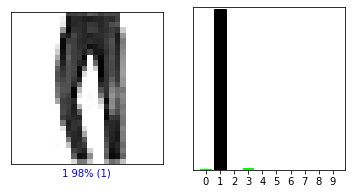

<Figure size 432x288 with 0 Axes>

In [ ]:
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()
train_data = train_data.reshape((60000, 28 * 28))
test_data = test_data.reshape((10000, 28 * 28))

train_data = train_data.astype('float32') / 255
test_data = test_data.astype('float32') / 255

predictions = model.predict(test_data)

for i in range(6):
  if (i==5):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions[i], test_labels, test_data.reshape(10000,28,28))
    plt.subplot(1,2,2)
    plot_value_array(i, predictions[i],  test_labels)
    plt.show()
    plt.clf()

In [ ]:
sssssssssssssssssssssssss

In [ ]:
from keras.datasets import fashion_mnist 

In [ ]:
from keras.utils.np_utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_labels[30000]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
from tensorflow.keras import optimizers
from keras import losses
from keras import metrics
from keras import models
from keras import layers


model = models.Sequential()
#Capa 5
model.add(layers.Dense(512, activation='relu', name="Capa5",input_shape=(28*28,)))

#Capa final
model.add(layers.Dense(10, name="CapaSalida",activation='softmax'))

In [ ]:
model.summary()
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa5 (Dense)               (None, 512)               401920    
                                                                 
 CapaSalida (Dense)          (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
one_hot_train_labels=train_labels


x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = one_hot_train_labels[:10000]
partial_y_train = one_hot_train_labels[10000:]

In [ ]:
history = model.fit(train_data,
          train_labels,
          epochs=5,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.9982 - accuracy: 0.6975 - val_loss: 0.7226 - val_accuracy: 0.7725
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.6556 - accuracy: 0.7903 - val_loss: 0.6092 - val_accuracy: 0.8042
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.5807 - accuracy: 0.8115 - val_loss: 0.5553 - val_accuracy: 0.8224
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.5402 - accuracy: 0.8218 - val_loss: 0.5259 - val_accuracy: 0.8288
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.5144 - accuracy: 0.8285 - val_loss: 0.5024 - val_accuracy: 0.8322


In [ ]:
test_loss, test_acc = model.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.5275 - accuracy: 0.8191


In [ ]:
print('test_loss:', test_loss)
print('test_acc:', test_acc)

test_loss: 0.5275247693061829
test_acc: 0.819100022315979


In [ ]:
# Look at confusion matrix 
# Note, this code is taken straight from the SKLEARN website, an nice way of 
# viewing confusion matrix.
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

313/313 [==============================] - 1s 3ms/step
=VALORES QUE PREDICE EL MODELO ENTRENADO CON LAS IMAGENES DE TEST======
=RECORDAR QUE LA PRIMERA IMAGEN DE TEST ERA UN 7=======================
[4.9093986e-05 5.7186444e-05 1.6255703e-04 1.2499210e-04 2.2032372e-04
 1.5562998e-01 1.8808112e-04 2.3031944e-01 1.1275896e-02 6.0197240e-01]
=CONVERSION DE PREDICCIONES EN CLASES DESDE VECTORES ONE-HOT ENCODING==
[9 2 1 ... 8 1 5]
=CONVERSION DE VALORES REALES EN CLASES DESDE VECTORES ONE-HOT ENCODING
[9 2 1 ... 8 1 5]
=MATRIZ DE CONFUSION CON VALORES REALES FRENTE A LOS PREDICHOS=========
[[814   5  13  54   5   1  90   0  18   0]
 [  9 933  14  34   7   0   1   0   2   0]
 [ 26   2 700   9 149   1  99   0  14   0]
 [ 31  15   9 856  38   1  46   0   4   0]
 [  0   2 115  33 730   1 114   0   5   0]
 [  0   0   0   2   0 891   0  58   4  45]
 [188   5 128  39  92   3 512   0  33   0]
 [  0   0   0   0   0  36   0 883   0  81]
 [  3   1  12  11   3   5  26   6 932   1]
 [  0   0   0   0  

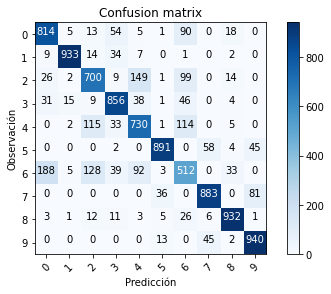

In [ ]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np

# Predicción de valores desde el dataset de validación
Y_pred = model.predict(test_data)
print("=VALORES QUE PREDICE EL MODELO ENTRENADO CON LAS IMAGENES DE TEST======")
print("=RECORDAR QUE LA PRIMERA IMAGEN DE TEST ERA UN 7=======================")
print(Y_pred[0])
print("=======================================================================")
# Convertir en predicciones de clases desde los vectores one-hot encoding 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
print("=CONVERSION DE PREDICCIONES EN CLASES DESDE VECTORES ONE-HOT ENCODING==")
print(Y_pred_classes)
print("=======================================================================")
# Convertir en clases de observación desde los vectores one-hot encoding
Y_true = np.argmax(test_labels, axis = 1) 
print("=CONVERSION DE VALORES REALES EN CLASES DESDE VECTORES ONE-HOT ENCODING")
print(Y_true)
print("=======================================================================")
# Computar la matriz de confusión
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
print("=MATRIZ DE CONFUSION CON VALORES REALES FRENTE A LOS PREDICHOS=========")
print(confusion_mtx)
print("=======================================================================")
# Dibujar la matriz de confusión
print("=PINTAMOS LA MATRIZ DE CONFUSION=======================================")
plot_confusion_matrix(confusion_mtx, classes = range(10))

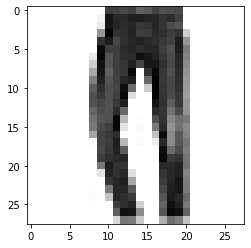

In [ ]:
# Veamos el elemento 6 de test y pintémoslo con matplotlib
from keras.datasets import fashion_mnist
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()
import matplotlib.pyplot as plt
digit = test_data[5]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
train_data = train_data.reshape((60000, 28 * 28))
test_data = test_data.reshape((10000, 28 * 28))

train_data = train_data.astype('float32') / 255
test_data = test_data.astype('float32') / 255

from keras.utils.np_utils import to_categorical

print("=VEMOS LAS ETIQUETAS DE TEST ORIGINALES================================")
print(test_labels)
print("=======================================================================")
test_labels = to_categorical(test_labels)
print("=VEMOS LAS ETIQUETAS DE TEST AL PASARLAS POR to_categorical============")
print(test_labels)
print("=======================================================================")

# Hacemos las predicciones con las imágenes de Test
predictions = model.predict(test_data)

print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============")
print(predictions[5])
print("=======================================================================")
print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============")
print(np.argmax(predictions[5]))
print("=======================================================================")
print("=LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 6 DEBERÍA SER 1===")
print(np.sum(predictions[5]))
print("=======================================================================")
print("=PINTAMOS TODAS LAS PREDICCIONES=======================================")
print(predictions)

=VEMOS LAS ETIQUETAS DE TEST ORIGINALES================================
[9 2 1 ... 8 1 5]
=VEMOS LAS ETIQUETAS DE TEST AL PASARLAS POR to_categorical============
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
313/313 [==============================] - 1s 3ms/step
=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============
[3.8083030e-03 9.8285365e-01 8.5019186e-04 1.7974591e-03 9.7751506e-03
 5.4864718e-06 8.8252319e-04 6.5730510e-06 1.7564917e-05 3.0193200e-06]
=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============
1
=LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 6 DEBERÍA SER 1===
0.99999994
=PINTAMOS TODAS LAS PREDICCIONES=======================================
[[4.9093986e-05 5.7186444e-05 1.6255703e-04 ... 2.3031944e-01
  1.1275896e-02 6.0197240e-01]
 [7.7372807e-04 3.8280388e-05 9.0130031e-01 ... 4.0704222e-08
  2.1306783e-04 1.8210150e-06]


In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

313/313 [==============================] - 1s 3ms/step


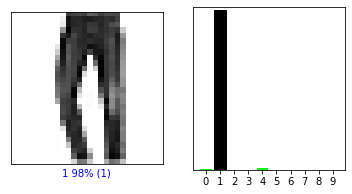

<Figure size 432x288 with 0 Axes>

In [ ]:
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()
train_data = train_data.reshape((60000, 28 * 28))
test_data = test_data.reshape((10000, 28 * 28))

train_data = train_data.astype('float32') / 255
test_data = test_data.astype('float32') / 255

predictions = model.predict(test_data)

for i in range(6):
  if (i==5):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions[i], test_labels, test_data.reshape(10000,28,28))
    plt.subplot(1,2,2)
    plot_value_array(i, predictions[i],  test_labels)
    plt.show()
    plt.clf()

ssssssssssssssssssssss

In [ ]:
from keras.datasets import fashion_mnist 

In [ ]:
from keras.utils.np_utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_labels[30000]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
from tensorflow.keras import optimizers
from keras import losses
from keras import metrics
from keras import models
from keras import layers


model = models.Sequential()
#Capa 6
model.add(layers.Dense(512, activation='relu', name="Capa6",input_shape=(28*28,)))

#Capa final
model.add(layers.Dense(10, name="CapaSalida",activation='softmax'))

In [ ]:
model.summary()
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa6 (Dense)               (None, 512)               401920    
                                                                 
 CapaSalida (Dense)          (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
one_hot_train_labels=train_labels


x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = one_hot_train_labels[:10000]
partial_y_train = one_hot_train_labels[10000:]

In [ ]:
history = model.fit(train_data,
          train_labels,
          epochs=5,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/5
469/469 [==============================] - 7s 13ms/step - loss: 0.5571 - accuracy: 0.8016 - val_loss: 0.4323 - val_accuracy: 0.8396
Epoch 2/5
469/469 [==============================] - 6s 13ms/step - loss: 0.3801 - accuracy: 0.8595 - val_loss: 0.3502 - val_accuracy: 0.8718
Epoch 3/5
469/469 [==============================] - 6s 13ms/step - loss: 0.3364 - accuracy: 0.8761 - val_loss: 0.2855 - val_accuracy: 0.8941
Epoch 4/5
469/469 [==============================] - 6s 13ms/step - loss: 0.3114 - accuracy: 0.8849 - val_loss: 0.2791 - val_accuracy: 0.8961
Epoch 5/5
469/469 [==============================] - 6s 13ms/step - loss: 0.2935 - accuracy: 0.8925 - val_loss: 0.2529 - val_accuracy: 0.9088


In [ ]:
test_loss, test_acc = model.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3417 - accuracy: 0.8796


In [ ]:
print('test_loss:', test_loss)
print('test_acc:', test_acc)

test_loss: 0.34167540073394775
test_acc: 0.8795999884605408


In [ ]:
# Look at confusion matrix 
# Note, this code is taken straight from the SKLEARN website, an nice way of 
# viewing confusion matrix.
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

313/313 [==============================] - 1s 3ms/step
=VALORES QUE PREDICE EL MODELO ENTRENADO CON LAS IMAGENES DE TEST======
=RECORDAR QUE LA PRIMERA IMAGEN DE TEST ERA UN 7=======================
[3.3837429e-07 1.3465459e-10 6.2334891e-08 1.2994203e-08 1.7604242e-08
 1.7969522e-01 6.4082894e-07 1.7621647e-01 7.2627872e-06 6.4407998e-01]
=CONVERSION DE PREDICCIONES EN CLASES DESDE VECTORES ONE-HOT ENCODING==
[9 2 1 ... 8 1 5]
=CONVERSION DE VALORES REALES EN CLASES DESDE VECTORES ONE-HOT ENCODING
[9 2 1 ... 8 1 5]
=MATRIZ DE CONFUSION CON VALORES REALES FRENTE A LOS PREDICHOS=========
[[856   1  31  17   5   3  81   0   6   0]
 [  3 965   0  24   4   0   3   0   1   0]
 [ 15   0 815   5 105   0  60   0   0   0]
 [ 23   4  17 873  54   0  26   0   3   0]
 [  0   1  99  19 832   0  49   0   0   0]
 [  0   0   0   0   0 983   0  13   1   3]
 [143   1 105  23  76   0 637   0  15   0]
 [  0   0   0   0   0  31   0 961   0   8]
 [  4   0   7   3   5   5   2   4 970   0]
 [  0   0   0   0  

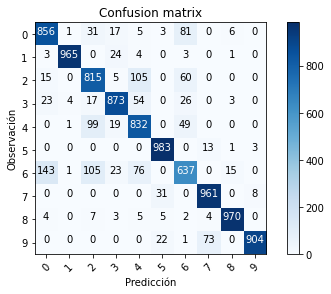

In [ ]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np

# Predicción de valores desde el dataset de validación
Y_pred = model.predict(test_data)
print("=VALORES QUE PREDICE EL MODELO ENTRENADO CON LAS IMAGENES DE TEST======")
print("=RECORDAR QUE LA PRIMERA IMAGEN DE TEST ERA UN 7=======================")
print(Y_pred[0])
print("=======================================================================")
# Convertir en predicciones de clases desde los vectores one-hot encoding 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
print("=CONVERSION DE PREDICCIONES EN CLASES DESDE VECTORES ONE-HOT ENCODING==")
print(Y_pred_classes)
print("=======================================================================")
# Convertir en clases de observación desde los vectores one-hot encoding
Y_true = np.argmax(test_labels, axis = 1) 
print("=CONVERSION DE VALORES REALES EN CLASES DESDE VECTORES ONE-HOT ENCODING")
print(Y_true)
print("=======================================================================")
# Computar la matriz de confusión
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
print("=MATRIZ DE CONFUSION CON VALORES REALES FRENTE A LOS PREDICHOS=========")
print(confusion_mtx)
print("=======================================================================")
# Dibujar la matriz de confusión
print("=PINTAMOS LA MATRIZ DE CONFUSION=======================================")
plot_confusion_matrix(confusion_mtx, classes = range(10))

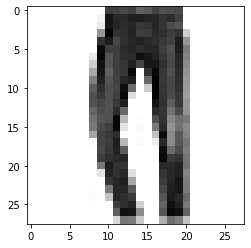

In [ ]:
# Veamos el elemento 6 de test y pintémoslo con matplotlib
from keras.datasets import fashion_mnist
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()
import matplotlib.pyplot as plt
digit = test_data[5]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
train_data = train_data.reshape((60000, 28 * 28))
test_data = test_data.reshape((10000, 28 * 28))

train_data = train_data.astype('float32') / 255
test_data = test_data.astype('float32') / 255

from keras.utils.np_utils import to_categorical

print("=VEMOS LAS ETIQUETAS DE TEST ORIGINALES================================")
print(test_labels)
print("=======================================================================")
test_labels = to_categorical(test_labels)
print("=VEMOS LAS ETIQUETAS DE TEST AL PASARLAS POR to_categorical============")
print(test_labels)
print("=======================================================================")

# Hacemos las predicciones con las imágenes de Test
predictions = model.predict(test_data)

print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============")
print(predictions[5])
print("=======================================================================")
print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============")
print(np.argmax(predictions[5]))
print("=======================================================================")
print("=LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 6 DEBERÍA SER 1===")
print(np.sum(predictions[5]))
print("=======================================================================")
print("=PINTAMOS TODAS LAS PREDICCIONES=======================================")
print(predictions)

=VEMOS LAS ETIQUETAS DE TEST ORIGINALES================================
[9 2 1 ... 8 1 5]
=VEMOS LAS ETIQUETAS DE TEST AL PASARLAS POR to_categorical============
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
313/313 [==============================] - 1s 3ms/step
=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============
[1.1271056e-04 9.9987918e-01 8.0736253e-09 6.5700206e-06 6.8325716e-07
 1.1337888e-13 7.5746021e-07 2.2874969e-16 1.6731715e-10 1.2807151e-15]
=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============
1
=LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 6 DEBERÍA SER 1===
0.9999999
=PINTAMOS TODAS LAS PREDICCIONES=======================================
[[3.38374292e-07 1.34654593e-10 6.23348910e-08 ... 1.76216468e-01
  7.26278722e-06 6.44079983e-01]
 [3.40751649e-05 6.00036785e-14 9.99339998e-01 ... 4.02579640e-15
  3.19695714e-10 1.379

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

313/313 [==============================] - 1s 3ms/step


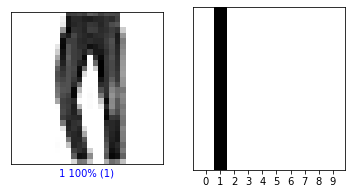

<Figure size 432x288 with 0 Axes>

In [ ]:
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()
train_data = train_data.reshape((60000, 28 * 28))
test_data = test_data.reshape((10000, 28 * 28))

train_data = train_data.astype('float32') / 255
test_data = test_data.astype('float32') / 255

predictions = model.predict(test_data)

for i in range(6):
  if (i==5):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions[i], test_labels, test_data.reshape(10000,28,28))
    plt.subplot(1,2,2)
    plot_value_array(i, predictions[i],  test_labels)
    plt.show()
    plt.clf()

sssssssssssss

In [ ]:
from keras.datasets import fashion_mnist 

In [ ]:
from keras.utils.np_utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_labels[30000]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
from tensorflow.keras import optimizers
from keras import losses
from keras import metrics
from keras import models
from keras import layers


model = models.Sequential()
#Capa 7
model.add(layers.Dense(512, activation='sigmoid', name="Capa7",input_shape=(28*28,)))

#Capa final
model.add(layers.Dense(10, name="CapaSalida",activation='softmax'))

In [ ]:
model.summary()
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa7 (Dense)               (None, 512)               401920    
                                                                 
 CapaSalida (Dense)          (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
one_hot_train_labels=train_labels


x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = one_hot_train_labels[:10000]
partial_y_train = one_hot_train_labels[10000:]

In [ ]:
history = model.fit(train_data,
          train_labels,
          epochs=5,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 1.7117 - accuracy: 0.5842 - val_loss: 1.3021 - val_accuracy: 0.6975
Epoch 2/5
469/469 [==============================] - 7s 15ms/step - loss: 1.1295 - accuracy: 0.7098 - val_loss: 0.9954 - val_accuracy: 0.7214
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.9252 - accuracy: 0.7290 - val_loss: 0.8620 - val_accuracy: 0.7385
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.8241 - accuracy: 0.7418 - val_loss: 0.7862 - val_accuracy: 0.7472
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.7627 - accuracy: 0.7515 - val_loss: 0.7393 - val_accuracy: 0.7557


In [ ]:
test_loss, test_acc = model.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.7517 - accuracy: 0.7495


In [ ]:
print('test_loss:', test_loss)
print('test_acc:', test_acc)

test_loss: 0.7517446875572205
test_acc: 0.7494999766349792


In [ ]:
# Look at confusion matrix 
# Note, this code is taken straight from the SKLEARN website, an nice way of 
# viewing confusion matrix.
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

313/313 [==============================] - 1s 3ms/step
=VALORES QUE PREDICE EL MODELO ENTRENADO CON LAS IMAGENES DE TEST======
=RECORDAR QUE LA PRIMERA IMAGEN DE TEST ERA UN 7=======================
[0.00096595 0.00056947 0.0027387  0.00174667 0.00232427 0.3860219
 0.00391041 0.1977205  0.06316341 0.3408388 ]
=CONVERSION DE PREDICCIONES EN CLASES DESDE VECTORES ONE-HOT ENCODING==
[5 2 1 ... 3 1 5]
=CONVERSION DE VALORES REALES EN CLASES DESDE VECTORES ONE-HOT ENCODING
[9 2 1 ... 8 1 5]
=MATRIZ DE CONFUSION CON VALORES REALES FRENTE A LOS PREDICHOS=========
[[791   4   6  96  10  24  53   1  15   0]
 [ 19 900  14  52  11   1   2   0   1   0]
 [ 21   1 581  12 226  14 128   0  17   0]
 [ 59  10   0 830  30   6  62   0   3   0]
 [  0   4 168  64 676  10  68   0  10   0]
 [  0   0   0   4   0 814   0 116   7  59]
 [243   2 115  65 213  41 282   0  39   0]
 [  0   0   0   0   0  95   0 828   0  77]
 [  3   2  18  24   4  33  12  13 890   1]
 [  0   0   0   2   0  40   0  54   1 903]]
=PINTA

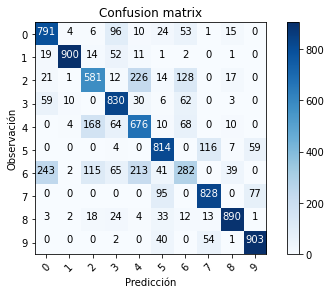

In [ ]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np

# Predicción de valores desde el dataset de validación
Y_pred = model.predict(test_data)
print("=VALORES QUE PREDICE EL MODELO ENTRENADO CON LAS IMAGENES DE TEST======")
print("=RECORDAR QUE LA PRIMERA IMAGEN DE TEST ERA UN 7=======================")
print(Y_pred[0])
print("=======================================================================")
# Convertir en predicciones de clases desde los vectores one-hot encoding 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
print("=CONVERSION DE PREDICCIONES EN CLASES DESDE VECTORES ONE-HOT ENCODING==")
print(Y_pred_classes)
print("=======================================================================")
# Convertir en clases de observación desde los vectores one-hot encoding
Y_true = np.argmax(test_labels, axis = 1) 
print("=CONVERSION DE VALORES REALES EN CLASES DESDE VECTORES ONE-HOT ENCODING")
print(Y_true)
print("=======================================================================")
# Computar la matriz de confusión
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
print("=MATRIZ DE CONFUSION CON VALORES REALES FRENTE A LOS PREDICHOS=========")
print(confusion_mtx)
print("=======================================================================")
# Dibujar la matriz de confusión
print("=PINTAMOS LA MATRIZ DE CONFUSION=======================================")
plot_confusion_matrix(confusion_mtx, classes = range(10))

In [ ]:
from keras.datasets import fashion_mnist 

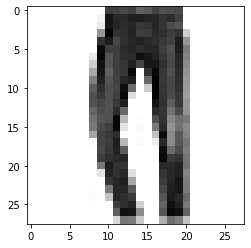

In [ ]:
# Veamos el elemento 6 de test y pintémoslo con matplotlib
from keras.datasets import fashion_mnist
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()
import matplotlib.pyplot as plt
digit = test_data[5]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
train_data = train_data.reshape((60000, 28 * 28))
test_data = test_data.reshape((10000, 28 * 28))

train_data = train_data.astype('float32') / 255
test_data = test_data.astype('float32') / 255

from keras.utils.np_utils import to_categorical

print("=VEMOS LAS ETIQUETAS DE TEST ORIGINALES================================")
print(test_labels)
print("=======================================================================")
test_labels = to_categorical(test_labels)
print("=VEMOS LAS ETIQUETAS DE TEST AL PASARLAS POR to_categorical============")
print(test_labels)
print("=======================================================================")

# Hacemos las predicciones con las imágenes de Test
predictions = model.predict(test_data)

print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============")
print(predictions[5])
print("=======================================================================")
print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============")
print(np.argmax(predictions[5]))
print("=======================================================================")
print("=LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 6 DEBERÍA SER 1===")
print(np.sum(predictions[5]))
print("=======================================================================")
print("=PINTAMOS TODAS LAS PREDICCIONES=======================================")
print(predictions)

=VEMOS LAS ETIQUETAS DE TEST ORIGINALES================================
[9 2 1 ... 8 1 5]
=VEMOS LAS ETIQUETAS DE TEST AL PASARLAS POR to_categorical============
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
313/313 [==============================] - 1s 3ms/step
=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============
[5.0331831e-02 8.1968170e-01 1.1171173e-02 6.4255647e-02 2.6090128e-02
 8.6656911e-04 2.6370188e-02 3.3739346e-04 7.2878791e-04 1.6657902e-04]
=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============
1
=LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 6 DEBERÍA SER 1===
1.0
=PINTAMOS TODAS LAS PREDICCIONES=======================================
[[9.65948799e-04 5.69465919e-04 2.73870467e-03 ... 1.97720498e-01
  6.31634146e-02 3.40838790e-01]
 [1.01595409e-02 2.53207487e-04 6.66172266e-01 ... 6.45902910e-05
  1.17898211e-02 8.62770714e

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

313/313 [==============================] - 1s 3ms/step


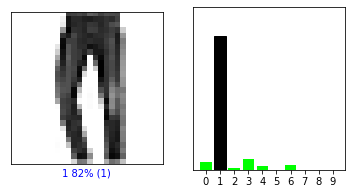

<Figure size 432x288 with 0 Axes>

In [ ]:
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()
train_data = train_data.reshape((60000, 28 * 28))
test_data = test_data.reshape((10000, 28 * 28))

train_data = train_data.astype('float32') / 255
test_data = test_data.astype('float32') / 255

predictions = model.predict(test_data)

for i in range(6):
  if (i==5):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions[i], test_labels, test_data.reshape(10000,28,28))
    plt.subplot(1,2,2)
    plot_value_array(i, predictions[i],  test_labels)
    plt.show()
    plt.clf()

ssssssssssssssssssss

In [ ]:
from keras.datasets import fashion_mnist 

In [ ]:
from keras.utils.np_utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_labels[30000]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
from tensorflow.keras import optimizers
from keras import losses
from keras import metrics
from keras import models
from keras import layers


model = models.Sequential()
#Capa 8
model.add(layers.Dense(512, activation='sigmoid', name="Capa8",input_shape=(28*28,)))

#Capa final
model.add(layers.Dense(10, name="CapaSalida",activation='softmax'))

In [ ]:
model.summary()
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa8 (Dense)               (None, 512)               401920    
                                                                 
 CapaSalida (Dense)          (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
one_hot_train_labels=train_labels


x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = one_hot_train_labels[:10000]
partial_y_train = one_hot_train_labels[10000:]

In [ ]:
history = model.fit(train_data,
          train_labels,
          epochs=5,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/5
469/469 [==============================] - 7s 15ms/step - loss: 0.5922 - accuracy: 0.7902 - val_loss: 0.4613 - val_accuracy: 0.8310
Epoch 2/5
469/469 [==============================] - 6s 13ms/step - loss: 0.4289 - accuracy: 0.8453 - val_loss: 0.3964 - val_accuracy: 0.8525
Epoch 3/5
469/469 [==============================] - 6s 13ms/step - loss: 0.3869 - accuracy: 0.8601 - val_loss: 0.3594 - val_accuracy: 0.8699
Epoch 4/5
469/469 [==============================] - 6s 13ms/step - loss: 0.3599 - accuracy: 0.8689 - val_loss: 0.3491 - val_accuracy: 0.8720
Epoch 5/5
469/469 [==============================] - 6s 13ms/step - loss: 0.3389 - accuracy: 0.8763 - val_loss: 0.3449 - val_accuracy: 0.8696


In [ ]:
test_loss, test_acc = model.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.4038 - accuracy: 0.8536


In [ ]:
print('test_loss:', test_loss)
print('test_acc:', test_acc)

test_loss: 0.4038163721561432
test_acc: 0.853600025177002


In [ ]:
# Look at confusion matrix 
# Note, this code is taken straight from the SKLEARN website, an nice way of 
# viewing confusion matrix.
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

313/313 [==============================] - 1s 3ms/step
=VALORES QUE PREDICE EL MODELO ENTRENADO CON LAS IMAGENES DE TEST======
=RECORDAR QUE LA PRIMERA IMAGEN DE TEST ERA UN 7=======================
[6.4445635e-06 7.7419770e-08 9.6572812e-06 2.5880468e-06 1.7413122e-05
 7.3405765e-02 4.1359650e-05 8.2822710e-02 1.6660510e-03 8.4202796e-01]
=CONVERSION DE PREDICCIONES EN CLASES DESDE VECTORES ONE-HOT ENCODING==
[9 2 1 ... 8 1 5]
=CONVERSION DE VALORES REALES EN CLASES DESDE VECTORES ONE-HOT ENCODING
[9 2 1 ... 8 1 5]
=MATRIZ DE CONFUSION CON VALORES REALES FRENTE A LOS PREDICHOS=========
[[912   0  26   9   3   1  42   0   7   0]
 [ 10 956   8  18   3   0   3   0   2   0]
 [ 20   0 884   6  60   0  27   0   3   0]
 [113  10  20 778  52   0  24   0   3   0]
 [  2   0 220  15 715   0  46   0   2   0]
 [  0   0   0   1   0 911   0  66   3  19]
 [238   1 174   9  63   0 497   0  18   0]
 [  0   0   0   0   0  14   0 967   0  19]
 [  2   1   4   3   5   2   4   4 975   0]
 [  0   0   0   0  

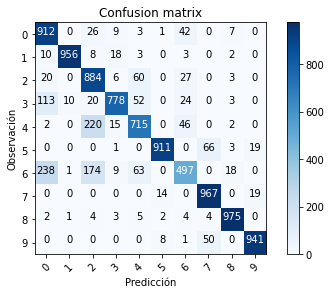

In [ ]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np

# Predicción de valores desde el dataset de validación
Y_pred = model.predict(test_data)
print("=VALORES QUE PREDICE EL MODELO ENTRENADO CON LAS IMAGENES DE TEST======")
print("=RECORDAR QUE LA PRIMERA IMAGEN DE TEST ERA UN 7=======================")
print(Y_pred[0])
print("=======================================================================")
# Convertir en predicciones de clases desde los vectores one-hot encoding 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
print("=CONVERSION DE PREDICCIONES EN CLASES DESDE VECTORES ONE-HOT ENCODING==")
print(Y_pred_classes)
print("=======================================================================")
# Convertir en clases de observación desde los vectores one-hot encoding
Y_true = np.argmax(test_labels, axis = 1) 
print("=CONVERSION DE VALORES REALES EN CLASES DESDE VECTORES ONE-HOT ENCODING")
print(Y_true)
print("=======================================================================")
# Computar la matriz de confusión
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
print("=MATRIZ DE CONFUSION CON VALORES REALES FRENTE A LOS PREDICHOS=========")
print(confusion_mtx)
print("=======================================================================")
# Dibujar la matriz de confusión
print("=PINTAMOS LA MATRIZ DE CONFUSION=======================================")
plot_confusion_matrix(confusion_mtx, classes = range(10))

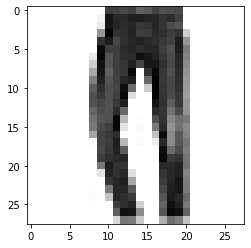

In [ ]:
# Veamos el elemento 6 de test y pintémoslo con matplotlib
from keras.datasets import fashion_mnist
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()
import matplotlib.pyplot as plt
digit = test_data[5]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
train_data = train_data.reshape((60000, 28 * 28))
test_data = test_data.reshape((10000, 28 * 28))

train_data = train_data.astype('float32') / 255
test_data = test_data.astype('float32') / 255

from keras.utils.np_utils import to_categorical

print("=VEMOS LAS ETIQUETAS DE TEST ORIGINALES================================")
print(test_labels)
print("=======================================================================")
test_labels = to_categorical(test_labels)
print("=VEMOS LAS ETIQUETAS DE TEST AL PASARLAS POR to_categorical============")
print(test_labels)
print("=======================================================================")

# Hacemos las predicciones con las imágenes de Test
predictions = model.predict(test_data)

print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============")
print(predictions[5])
print("=======================================================================")
print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============")
print(np.argmax(predictions[5]))
print("=======================================================================")
print("=LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 6 DEBERÍA SER 1===")
print(np.sum(predictions[5]))
print("=======================================================================")
print("=PINTAMOS TODAS LAS PREDICCIONES=======================================")
print(predictions)

=VEMOS LAS ETIQUETAS DE TEST ORIGINALES================================
[9 2 1 ... 8 1 5]
=VEMOS LAS ETIQUETAS DE TEST AL PASARLAS POR to_categorical============
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
313/313 [==============================] - 1s 3ms/step
=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============
[1.2399122e-02 9.8688972e-01 1.6363790e-04 1.4324009e-04 3.0198906e-04
 5.0976205e-09 9.8362078e-05 2.5564557e-07 3.5974062e-06 4.4702717e-09]
=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============
1
=LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 6 DEBERÍA SER 1===
0.99999994
=PINTAMOS TODAS LAS PREDICCIONES=======================================
[[6.4445635e-06 7.7419770e-08 9.6572812e-06 ... 8.2822710e-02
  1.6660510e-03 8.4202796e-01]
 [6.6661875e-04 1.9545161e-07 9.9255979e-01 ... 1.4851085e-08
  1.5473312e-05 1.6624591e-08]


In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

313/313 [==============================] - 1s 3ms/step


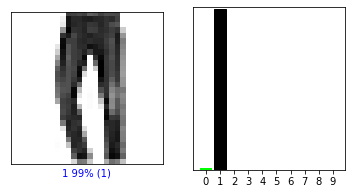

<Figure size 432x288 with 0 Axes>

In [ ]:
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()
train_data = train_data.reshape((60000, 28 * 28))
test_data = test_data.reshape((10000, 28 * 28))

train_data = train_data.astype('float32') / 255
test_data = test_data.astype('float32') / 255

predictions = model.predict(test_data)

for i in range(6):
  if (i==5):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions[i], test_labels, test_data.reshape(10000,28,28))
    plt.subplot(1,2,2)
    plot_value_array(i, predictions[i],  test_labels)
    plt.show()
    plt.clf()

fin